## Workshop W03

In [1]:
# Libraries

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

%matplotlib widget

### Exercise 1
Find the critical points of the function 𝑓(𝑥,𝑦)=$x^{2}$+$y^{4}$−4𝑥𝑦 by using first partial derivatives. Then use second partial derivatives to establish whether each critical point is a minimum, a maximum, or a saddle point.

In [2]:
# Define the function

x, y = sp.symbols('x y', real=True)
f = sp.Function('f', real=True)

f = x**2 + y**4 - 4*x*y
f

x**2 - 4*x*y + y**4

In [3]:
#Plot it just cuz it's pretty

sp.plotting.plot3d(f, (x, -2, 2), (y, -3, 3))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
# Find first partial derivatives

f_x = f.diff(x)
f_y = f.diff(y)

f_x, f_y

(2*x - 4*y, -4*x + 4*y**3)

In [5]:
# Find critical points

eq1 = sp.Eq(f_x, 0).n()
eq2 = sp.Eq(f_y, 0).n()

sol = sp.solve((eq1, eq2), (x, y))
sol

[(-2.82842712474619, -1.41421356237310),
 (0.0, 0.0),
 (2.82842712474619, 1.41421356237310)]

In [6]:
# Find second partial derivatives

f_xx = f.diff(x, 2)
f_yy = f.diff(y, 2)
f_xy = f.diff(x, y)

f_xx, f_yy, f_xy

(2, 12*y**2, -4)

In [7]:
# Find the nature of critical points

# Critical point 1
dic1 = {x:sol[0][0], y:sol[0][1]}
d1 = int(f_xx.subs(dic1) * f_yy.subs(dic1) - f_xy.subs(dic1)**2)

# d = 32
cp1 = f_xx.subs(dic1)
# f_xx(sol[0]) = 2
# d > 0 and f_xx > 0 --> sol[0] is a local minimum

# Critical point 2
dic2 = {x:sol[1][0], y:sol[1][1]}
d2 = int(f_xx.subs(dic2) * f_yy.subs(dic2) - f_xy.subs(dic2)**2)

# d = -16 --> sol[1] is a saddle point


# Critical point 3
dic3 = {x:sol[2][0], y:sol[2][1]}
d3 = int(f_xx.subs(dic3) * f_yy.subs(dic3) - f_xy.subs(dic3)**2)

# d = 32
cp3 = f_xx.subs(dic3)
# f_xx(sol[2]) = 2
# d > 0 and f_xx > 0 --> sol[0] is a local minimum

print(d1, d2, d3)
print(cp1, cp3)

32 -16 32
2 2


### Exercise 2

Using the Gradient Descent Method with initial approximation 𝑥0=(0,0), find the minimum point and the minimum value of the function 𝑔(𝑥,𝑦)=(1−𝑥+𝑥2)⋅𝑒𝑦2+(1−𝑦+𝑦2)⋅𝑒𝑥2.

In [8]:
# Define function

x, y = sp.symbols('x[0] x[1]', real=True)
g = sp.Function('g', real=True)

g = (1-x+x**2)*sp.exp(y**2) + (1-y+y**2)*sp.exp(x**2)
g

sp.plotting.plot3d(g, (x, -2, 2), (y, -2, 2))

print(g)
print(g.diff(x))
print(g.diff(y))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(x[0]**2 - x[0] + 1)*exp(x[1]**2) + (x[1]**2 - x[1] + 1)*exp(x[0]**2)
2*x[0]*(x[1]**2 - x[1] + 1)*exp(x[0]**2) + (2*x[0] - 1)*exp(x[1]**2)
2*x[1]*(x[0]**2 - x[0] + 1)*exp(x[1]**2) + (2*x[1] - 1)*exp(x[0]**2)


In [9]:
# Define numpy function
def g(x):
    return (x[0]**2 - x[0] + 1)*np.exp(x[1]**2) + (x[1]**2 - x[1] + 1)*np.exp(x[0]**2)

def grad(x):
    return np.array([ 2*x[0]*(x[1]**2 - x[1] + 1)*np.exp(x[0]**2) + (2*x[0] - 1)*np.exp(x[1]**2),
                     2*x[1]*(x[0]**2 - x[0] + 1)*np.exp(x[1]**2) + (2*x[1] - 1)*np.exp(x[0]**2) ])


# Gradient descent
xk = np.array([0, 0])
alpha = 0.01
max_iter = 1000
tol = 1e-6
k = 0

while k < max_iter and np.linalg.norm(grad(xk), 2) > tol:
    xk = xk - alpha*grad(xk)
    k = k + 1

print('xk (optimal point) = ', xk)
print('g(xk) (optimal value) = ', g(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad(xk), 2))

xk (optimal point) =  [0.2778799 0.2778799]
g(xk) (optimal value) =  1.7270110514248864
k =  387
|grad| =  9.643289486085021e-07


### Exercise 3

On a certain workday, the rate, in tons per hour, at which unprocessed gravel arrives at a gravel processing plant is modeled by 𝐺(𝑡)=90+45⋅cos(𝑡2/18), where 𝑡 is measured in hours and 0≤𝑡≤8. 

At the beginning of the workday (𝑡=0), the plant has 500 tons of unprocessed gravel.

During the hours of operation, 0≤𝑡≤8, the plant processes gravel at a constant rate 𝑃(𝑡)=100 tons per hour.


a) Find the total amount of unprocessed gravel that arrives at the plant during the hours of operation on this workday.

b) Is the amount of unprocessed gravel at the end of the workday (𝑡=8) greater or smaller than amount of gravel at the beginning of the workday?

In [26]:
# Define function

t = sp.Symbol('t', positive=True)
g = sp.Function('g', real=True)
G = sp.Function('G', real=True)

g = 90+45*sp.cos((t**2)/18)
G = sp.integrate(g, t)
G

90*t + 135*sqrt(pi)*fresnelc(t/(3*sqrt(pi)))*gamma(1/4)/(4*gamma(5/4))

In [27]:
# a) amount of unprocessed gravel

ans_a = G.subs(t, 8) - G.subs(t, 0)
ans_a.n()

825.551088587770

In [33]:
# b) 500 + amount - rate*8

ans_b = 500 + sp.integrate(g, (t, 0, 8)) - 100*8
ans_b.n()

# at the end of the day there's approximately 25.55 tons more gravel than at the beginning of the day

525.551088587770

In [29]:
sp.plot(g, (t, 0, 8))
sp.plot(sp.integrate(g, t), (t, 0, 8))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exercise 4

Solve the system of equations:

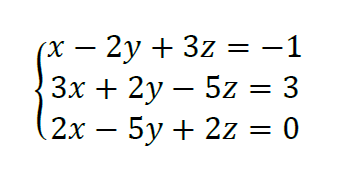

using Gradient Descent Method applied to a function of the kind 𝑓(𝐱)=‖𝐴𝐱−𝑏‖22 where 𝐴𝐱=𝑏 is the matrix equation that corresponds to the system, and ‖ ⋅ ‖2 is the Euclidean norm.

In [14]:
# Define varibales and matrices
A = sp.Matrix([[1, -2, 3], [3, 2, -5], [2, -5, 2]])
b = sp.Matrix([-1, 3, 0])
x, y, z, X = sp.symbols('x[0] x[1] x[2] X', real=True)
X = sp.Matrix([x, y, z])

A, b, X

(Matrix([
 [1, -2,  3],
 [3,  2, -5],
 [2, -5,  2]]),
 Matrix([
 [-1],
 [ 3],
 [ 0]]),
 Matrix([
 [x[0]],
 [x[1]],
 [x[2]]]))

In [15]:
# Define the function f
f = sp.Function('f', real=True)
f = ((A*X - b).norm())**2

print(f)
print(f.diff(x))
print(f.diff(y))
print(f.diff(z))

(2*x[0] - 5*x[1] + 2*x[2])**2 + (x[0] - 2*x[1] + 3*x[2] + 1)**2 + (3*x[0] + 2*x[1] - 5*x[2] - 3)**2
28*x[0] - 12*x[1] - 16*x[2] - 16
-12*x[0] + 66*x[1] - 52*x[2] - 16
-16*x[0] - 52*x[1] + 76*x[2] + 36


In [21]:
def f(x):
    return (2*x[0] - 5*x[1] + 2*x[2])**2 + (x[0] - 2*x[1] + 3*x[2] + 1)**2 + (3*x[0] + 2*x[1] - 5*x[2] - 3)**2

def grad(x):
    return np.array([ 28*x[0] - 12*x[1] - 16*x[2] - 16,
                     -12*x[0] + 66*x[1] - 52*x[2] - 16,
                     -16*x[0] - 52*x[1] + 76*x[2] + 36 ])

In [22]:
def gradient_descent(f, grad, x0, alpha = 0.01, mode = 'min', max_iter = 1000, tol = 1e-6):
    # initialize the sequence
    k = 0
    xk = x0
    grad_k = grad(x0)
    
    while (k < max_iter) and (np.linalg.norm(grad_k, 2) >= tol):
        k += 1
        if mode == 'min':
            xk = xk - alpha*grad_k
        else:
            xk = xk + alpha*grad_k
            
        grad_k = grad(xk)
        
    print('xk = ', xk)
    print('g(xk) = ', f(xk))
    print('k = ', k)
    print('|grad| = ', np.linalg.norm(grad_k, 2))
    
    return xk, f(xk), np.linalg.norm(grad_k, 2), k

In [23]:
x0 = np.array([1, 0, -1])
gradient_descent(f, grad, x0)

xk =  [ 0.26086976 -0.08695635 -0.4782607 ]
g(xk) =  1.5025399242152352e-13
k =  421
|grad| =  9.740922216752993e-07


(array([ 0.26086976, -0.08695635, -0.4782607 ]),
 1.5025399242152352e-13,
 9.740922216752993e-07,
 421)

In [24]:
opt.minimize(f, x0, method='BFGS')

      fun: 8.196715003809166e-14
 hess_inv: array([[0.13657845, 0.10302457, 0.09924386],
       [0.10302457, 0.11058601, 0.0973535 ],
       [0.09924386, 0.0973535 , 0.10066163]])
      jac: array([ 8.93507490e-12, -4.27172520e-10, -2.61191957e-10])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.26086943, -0.08695665, -0.478261  ])

In [20]:
# solution to the system using gradient descent:
# optimal point: [ 0.26086976, -0.08695635, -0.4782607 ]
# optimal value: 1.5025399242152352e-13